In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("beginner_datasets/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encode',OneHotEncoder(),[5])],remainder="passthrough")
# dfEncoded1 = ct.fit_transform(df)
dfEncoded = pd.DataFrame(ct.fit_transform(df))
dfEncoded.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,1.0,19,female,27.9,0,yes,16884.924
1,0.0,0.0,1.0,0.0,18,male,33.77,1,no,1725.5523
2,0.0,0.0,1.0,0.0,28,male,33.0,3,no,4449.462
3,0.0,1.0,0.0,0.0,33,male,22.705,0,no,21984.47061
4,0.0,1.0,0.0,0.0,32,male,28.88,0,no,3866.8552


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfEncoded[5] = le.fit_transform(dfEncoded[5])
dfEncoded[8] = le.fit_transform(dfEncoded[8])
dfEncoded.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,1.0,19,0,27.9,0,1,16884.924
1,0.0,0.0,1.0,0.0,18,1,33.77,1,0,1725.5523
2,0.0,0.0,1.0,0.0,28,1,33.0,3,0,4449.462
3,0.0,1.0,0.0,0.0,33,1,22.705,0,0,21984.47061
4,0.0,1.0,0.0,0.0,32,1,28.88,0,0,3866.8552


In [18]:
dfEncoded[0] = dfEncoded[0].astype(np.int8)
dfEncoded[1] = dfEncoded[1].astype(np.int8)
dfEncoded[2] = dfEncoded[2].astype(np.int8)
dfEncoded[3] = dfEncoded[3].astype(np.int8)
dfEncoded[4] = dfEncoded[4].astype(np.int8)
dfEncoded[6] = dfEncoded[6].astype(np.float16)
dfEncoded[7] = dfEncoded[7].astype(np.int8)
dfEncoded[9] = dfEncoded[9].astype(np.float32)

In [19]:
dfEncoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1338 non-null   int8   
 1   1       1338 non-null   int8   
 2   2       1338 non-null   int8   
 3   3       1338 non-null   int8   
 4   4       1338 non-null   int8   
 5   5       1338 non-null   int64  
 6   6       1338 non-null   float16
 7   7       1338 non-null   int8   
 8   8       1338 non-null   int64  
 9   9       1338 non-null   float32
dtypes: float16(1), float32(1), int64(2), int8(6)
memory usage: 36.7 KB


In [20]:
dfEncoded.describe()

,0,1,2,3,4,5,6,7,8,9
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.242152,0.242900,0.272048,0.242900,39.207025,0.505232,30.656250,1.094918,0.204783,13270.422852
std,0.428546,0.428995,0.445181,0.428995,14.049960,0.500160,6.097656,1.205493,0.403694,12110.010742
min,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,15.960938,0.000000,0.000000,1121.873901
25%,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,26.300781,0.000000,0.000000,4740.287109
50%,0.000000,0.000000,0.000000,0.000000,39.000000,1.000000,30.406250,1.000000,0.000000,9382.032715
75%,0.000000,0.000000,1.000000,0.000000,51.000000,1.000000,34.687500,2.000000,0.000000,16639.912109
max,1.000000,1.000000,1.000000,1.000000,64.000000,1.000000,53.125000,5.000000,1.000000,63770.429688


In [27]:
import warnings
warnings.filterwarnings('ignore')
def detect_outliers(df):
    cols = list(df)
    outliers = pd.DataFrame(columns = ["Feature", "Outlier"])
    for col in cols:
        if col in df.select_dtypes(include=np.number).columns:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - 1.5 * iqr
            fence_high = q3 + 1.5 * iqr
            outliers = outliers.append({'Feature':col,'Number of Outliers':df.loc[(df[col] < fence_low) | (df[col] > fence_high)].shape[0]}, ignore_index=True)
    return outliers
detect_outliers(dfEncoded)

,Feature,Outlier,Number of Outliers
0,0,NaN,324.0
1,1,NaN,325.0
2,2,NaN,0.0
3,3,NaN,325.0
4,4,NaN,0.0
5,5,NaN,0.0
6,6,NaN,9.0
7,7,NaN,0.0
8,8,NaN,274.0
9,9,NaN,139.0


<AxesSubplot:>

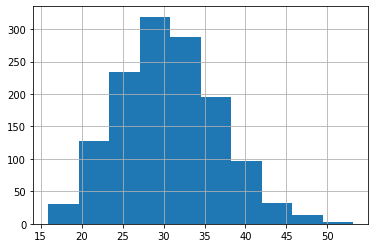

In [29]:
dfEncoded[6].hist()

<AxesSubplot:>

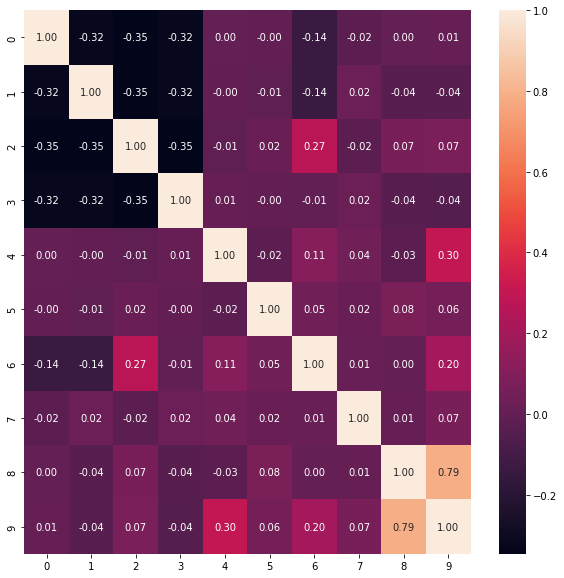

In [32]:
corr = dfEncoded.corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.2f',)

In [33]:
X = dfEncoded.iloc[:,:-1].values
y = dfEncoded.iloc[:,-1].values

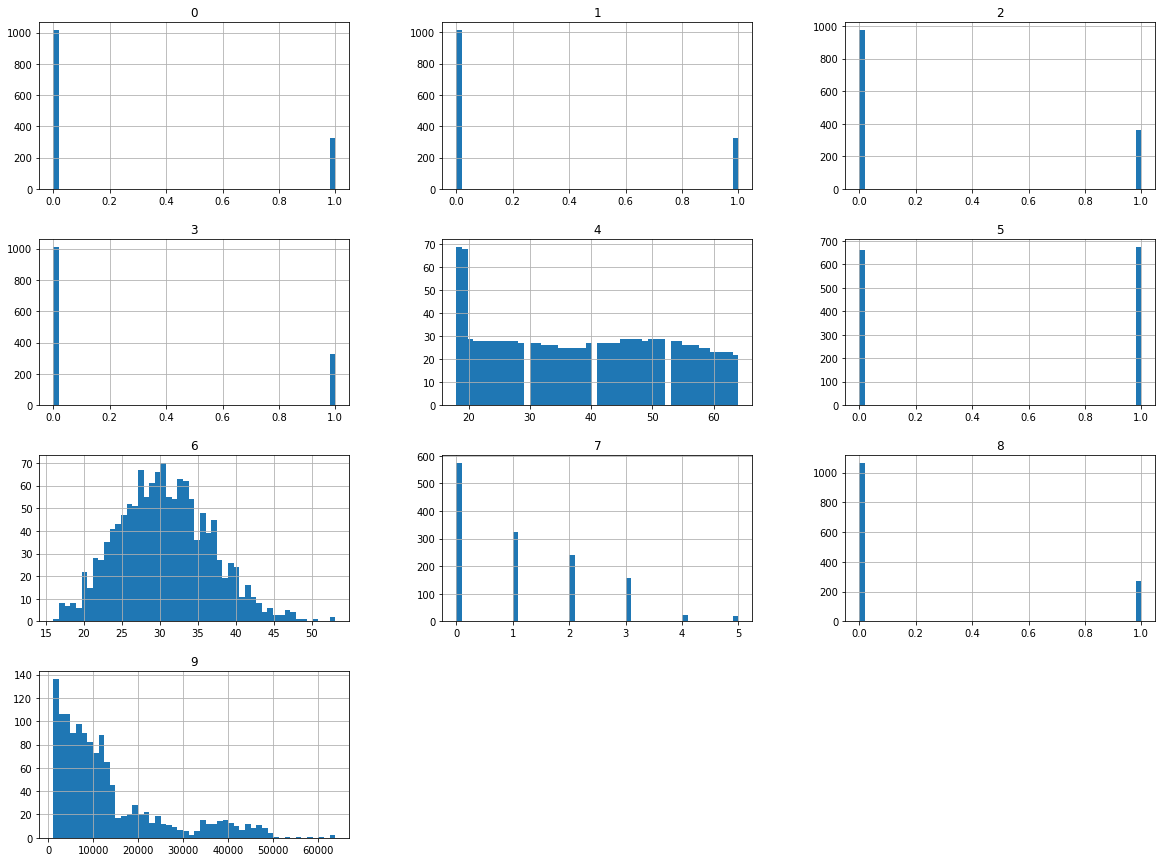

In [35]:
dfEncoded.hist(bins=50, figsize=(20,15));

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_trainScaled = sc.fit_transform(X_train)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


In [40]:
models = []
models.append(('LR', LinearRegression()))
models.append(('RFR', RandomForestRegressor()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR()))

In [42]:
from sklearn.model_selection import cross_val_score,KFold
names = []
scores = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7,shuffle=True)
    cv_results = cross_val_score(model, X_trainScaled, y_train, cv=kfold, scoring='neg_mean_squared_error')
    names.append(name)
    scores.append(cv_results)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: -38440364.308635 (6869451.766403)
RFR: -25455881.238063 (5233409.150098)
DTR: -50258082.356320 (9016032.377585)
KNN: -33017830.200000 (6095351.507634)
SVR: -157431143.300335 (28063851.818255)


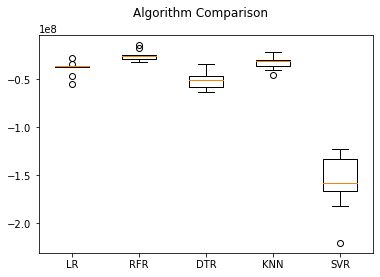

In [44]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)
plt.show()

In [45]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [46]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
rfcv =  RandomizedSearchCV(rf, random_grid, cv=5, scoring='neg_mean_squared_error')
rfcv.fit(X_trainScaled, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='neg_mean_squared_error')

In [47]:
rfcv.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [48]:
rfcv.best_score_


-22894024.158918697

In [50]:
rfc = RandomForestRegressor(n_estimators=rfcv.best_params_['n_estimators'],
                            max_features=rfcv.best_params_['max_features'],
                            max_depth=rfcv.best_params_['max_depth'],
                            min_samples_split=rfcv.best_params_['min_samples_split'],
                            min_samples_leaf=rfcv.best_params_['min_samples_leaf'],
                            bootstrap=rfcv.best_params_['bootstrap'])
rfc.fit(X_trainScaled, y_train)

RandomForestRegressor(max_depth=100, max_features='auto', min_samples_leaf=4,
                      min_samples_split=5, n_estimators=800)

In [51]:
y_preds = rfc.predict(X_test)

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test, y_preds)

-0.10424463544928075

In [ ]:
import pickle
pickle.dump(rfc, open('model.pkl','wb'))
pickle.dump(sc, open('scaler.pkl','wb'))


In [ ]:
model = pickle.load(open('model.pkl','rb'))
scaler = pickle.load(open('scaler.pkl','rb'))
model.predict(X_test)